In [18]:
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import numpy as np
from sklearn.model_selection import StratifiedKFold

In [2]:
(X_treinamento, y_treinamento), (X_teste, y_teste) = mnist.load_data()

In [3]:
X_treinamento.shape

(60000, 28, 28)

Text(0.5, 1.0, 'Classe5')

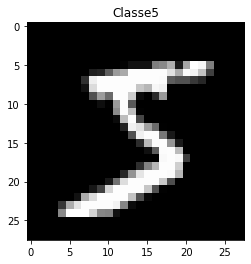

In [4]:
i = 0
plt.imshow(X_treinamento[i], cmap = 'gray')
plt.title('Classe' + str(y_treinamento[i]))

In [5]:
previsores_treinamento = X_treinamento.reshape(X_treinamento.shape[0], 28, 28, 1)
previsores_treinamento = previsores_treinamento.astype('float32')
previsores_teste = X_teste.reshape(X_teste.shape[0], 28, 28, 1)
previsores_teste = previsores_teste.astype('float32')

In [6]:
previsores_treinamento /= 255
previsores_teste /= 255

In [7]:
classe_treinamento = np_utils.to_categorical(y_treinamento, 10)
classe_teste = np_utils.to_categorical(y_teste, 10)

In [8]:
classe_treinamento.shape

(60000, 10)

In [15]:
classificador = Sequential()

classificador.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1), activation='relu'))
classificador.add(BatchNormalization())
classificador.add(MaxPooling2D(pool_size=(2, 2)))
# classificador.add(Flatten())

classificador.add(Conv2D(32, (3, 3), activation='relu'))
classificador.add(BatchNormalization())
classificador.add(MaxPooling2D(pool_size=(2, 2)))
classificador.add(Flatten())

classificador.add(Dense(units=128, activation='relu'))
classificador.add(Dropout(0.2))

classificador.add(Dense(units=128, activation='relu'))
classificador.add(Dropout(0.2))

classificador.add(Dense(units=10, activation='softmax'))
classificador.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

classificador.fit(
    previsores_treinamento,
    classe_treinamento,
    batch_size=128,
    epochs= 5,
    validation_data=(previsores_teste, classe_teste)
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 38s 634us/step - loss: 0.2015 - accuracy: 0.9371 - val_loss: 0.2062 - val_accuracy: 0.9401
Epoch 2/5
60000/60000 [==============================] - 42s 708us/step - loss: 0.0617 - accuracy: 0.9813 - val_loss: 0.0555 - val_accuracy: 0.9847
Epoch 3/5
60000/60000 [==============================] - 45s 742us/step - loss: 0.0459 - accuracy: 0.9863 - val_loss: 0.0394 - val_accuracy: 0.9873
Epoch 4/5
60000/60000 [==============================] - 40s 674us/step - loss: 0.0352 - accuracy: 0.9893 - val_loss: 0.0364 - val_accuracy: 0.9886
Epoch 5/5
60000/60000 [==============================] - 43s 716us/step - loss: 0.0305 - accuracy: 0.9908 - val_loss: 0.0308 - val_accuracy: 0.9909


In [16]:
resultado = classificador.evaluate(previsores_teste, classe_teste)
resultado

10000/10000 [==============================] - 3s 274us/step


[0.03078130389549515, 0.9908999800682068]

In [19]:
seed = 5
np.random.seed(seed)

In [21]:
previsores = previsores_treinamento
classe = classe_treinamento

In [22]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
resultados = []

In [24]:
a = np.zeros(5)
b = np.zeros(shape=(classe.shape[0], 1))
resultados2= []

for indice_treinamento, indice_teste in kfold.split(previsores, np.zeros(shape=(classe.shape[0], 1))):
#     print('Indices treinamento: ', indice_treinamento, 'índice teste: ', indice_teste)
    classificador = Sequential()
    classificador.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1), activation='relu'))
    classificador.add(MaxPooling2D(pool_size=(2, 2)))
    classificador.add(Flatten())
    classificador.add(Dense(units=128, activation='relu'))
    classificador.add(Dense(units=10, activation='softmax'))
    
    classificador.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    classificador.fit(previsores[indice_treinamento], classe[indice_treinamento], batch_size=128, epochs=5)
    precisao = classificador.evaluate(previsores[indice_teste], classe[indice_teste])
    resultados.append(precisao[1])
    resultados2.append(precisao)


Epoch 1/5
48000/48000 [==============================] - 8s 173us/step - loss: 0.2484 - accuracy: 0.9287
Epoch 2/5
48000/48000 [==============================] - 8s 167us/step - loss: 0.0762 - accuracy: 0.9781
Epoch 3/5
48000/48000 [==============================] - 8s 173us/step - loss: 0.0498 - accuracy: 0.9850
Epoch 4/5
48000/48000 [==============================] - 10s 198us/step - loss: 0.0374 - accuracy: 0.9888
Epoch 5/5
12000/12000 [==============================] - 1s 88us/step
Epoch 1/5
48000/48000 [==============================] - 10s 199us/step - loss: 0.2407 - accuracy: 0.9319
Epoch 2/5
48000/48000 [==============================] - 9s 182us/step - loss: 0.0756 - accuracy: 0.9779
Epoch 3/5
48000/48000 [==============================] - 8s 163us/step - loss: 0.0494 - accuracy: 0.9849
Epoch 4/5
48000/48000 [==============================] - 8s 162us/step - loss: 0.0370 - accuracy: 0.9889
Epoch 5/5
12000/12000 [==============================] - 1s 112us/step
Epoch 1/5
48000/4

In [25]:
# media = resultados.mean()
media = sum(resultados) / len(resultados)
media

0.9838333368301392